# Feature Selection

In [7]:
import seaborn as sns
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [5]:
#read in datapaths of labelled data
filepaths = [Path("./data/shapefiles/segments_2011023_0.shp"), Path("./data/shapefiles/segments_2011201_0.shp"),
             Path("./data/shapefiles/segments_2011203_0.shp"), Path("./data/shapefiles/segments_2010133_0.shp"),
             Path("./data/shapefiles/segments_2011200_0.shp")]

In [6]:
gdfs = []
for filepath in filepaths:
    gdfs.append(gpd.read_file(filepath))
gdfs[0].head()

,seg_index,area_m,blue_value,blue_val_1,green_valu,green_va_1,nir_value,nir_value_,red_value,red_value_,...,dSI_rb,dSI_br,dSI_gb,dSI_nr,dSI_rn,dSI_ng,dSI_bn,land_class,burn_class,geometry
0,17,3265.85,97.024300,72.765828,65.335643,50.062458,57.833333,99.000000,80.725107,56.197437,...,0.036776,-0.036776,-0.010337,-0.441008,0.441008,-0.389213,0.405810,forest,0,"POLYGON ((-121.5388488769531 39.7265625, -121...."
1,37,2659.18,94.475519,59.952203,63.518769,39.916764,45.800000,90.250000,79.149569,43.251224,...,0.073555,-0.073555,0.004681,-0.618952,0.618952,-0.548766,0.548713,forest,0,"POLYGON ((-121.5206954058479 39.7265625, -121...."
2,3,2894.16,86.018102,90.460690,65.027849,68.429520,20.533333,70.666667,75.688196,87.232648,...,-0.045714,0.045714,-0.000309,-0.468292,0.468292,-0.536115,0.491737,forest,1,"POLYGON ((-121.5505308263442 39.7265625, -121...."
3,27,5323.94,79.441831,94.398626,56.938570,64.188483,22.166667,87.633333,73.195121,77.480319,...,0.057506,-0.057506,0.025492,-0.596595,0.596595,-0.593989,0.526519,forest,0,"POLYGON ((-121.5298865823185 39.7265625, -121...."
4,47,2805.50,98.464530,62.863757,62.296575,42.170497,71.461538,92.846154,71.210939,45.611160,...,-0.001575,0.001575,-0.027965,-0.339396,0.339396,-0.306810,0.351463,forest,0,POLYGON ((-121.5225444120519 39.72651762120864...


In [26]:
gdf_all = pd.concat(gdfs)
gdf_all.dropna(inplace=True)
gdf_all = gdf_all.astype({'burn_class' : 'uint8'})
gdf_all

,seg_index,area_m,blue_value,blue_val_1,green_valu,green_va_1,nir_value,nir_value_,red_value,red_value_,...,dSI_rb,dSI_br,dSI_gb,dSI_nr,dSI_rn,dSI_ng,dSI_bn,land_class,burn_class,geometry
0,17,3265.85,97.024300,72.765828,65.335643,50.062458,57.833333,99.000000,80.725107,56.197437,...,0.036776,-0.036776,-0.010337,-0.441008,0.441008,-0.389213,0.405810,forest,0,"POLYGON ((-121.5388488769531 39.7265625, -121...."
1,37,2659.18,94.475519,59.952203,63.518769,39.916764,45.800000,90.250000,79.149569,43.251224,...,0.073555,-0.073555,0.004681,-0.618952,0.618952,-0.548766,0.548713,forest,0,"POLYGON ((-121.5206954058479 39.7265625, -121...."
2,3,2894.16,86.018102,90.460690,65.027849,68.429520,20.533333,70.666667,75.688196,87.232648,...,-0.045714,0.045714,-0.000309,-0.468292,0.468292,-0.536115,0.491737,forest,1,"POLYGON ((-121.5505308263442 39.7265625, -121...."
3,27,5323.94,79.441831,94.398626,56.938570,64.188483,22.166667,87.633333,73.195121,77.480319,...,0.057506,-0.057506,0.025492,-0.596595,0.596595,-0.593989,0.526519,forest,0,"POLYGON ((-121.5298865823185 39.7265625, -121...."
4,47,2805.50,98.464530,62.863757,62.296575,42.170497,71.461538,92.846154,71.210939,45.611160,...,-0.001575,0.001575,-0.027965,-0.339396,0.339396,-0.306810,0.351463,forest,0,POLYGON ((-121.5225444120519 39.72651762120864...
5,25,3930.80,79.232492,84.662461,54.582256,55.686909,23.791667,87.875000,71.843533,65.856309,...,0.076033,-0.076033,0.022241,-0.645678,0.645678,-0.617078,0.556754,forest,0,"POLYGON ((-121.5309816248277 39.7265625, -121...."
6,51,2720.56,68.351869,56.855857,48.352097,39.038628,20.333333,81.400000,55.520624,40.307315,...,0.066733,-0.066733,0.014429,-0.801517,0.801517,-0.759655,0.718976,forest,0,POLYGON ((-121.5260314941406 39.72646825453814...
7,2,4345.89,84.417933,76.088665,64.176546,53.905771,29.851852,83.370370,72.657536,61.513161,...,0.031054,-0.031054,0.034426,-0.568439,0.568439,-0.579683,0.523185,forest,1,"POLYGON ((-121.5510873233571 39.7265625, -121...."
8,4,4158.65,74.688110,79.030712,55.724711,58.391204,14.846154,68.653846,65.502199,70.291837,...,-0.007001,0.007001,0.004780,-0.618667,0.618667,-0.660035,0.598106,forest,1,"POLYGON ((-121.5499653535731 39.7265625, -121...."
9,13,3688.38,89.508993,58.461002,63.013952,38.132795,34.782609,101.782609,76.674063,36.478904,...,0.154303,-0.154303,0.036739,-0.848174,0.848174,-0.743591,0.710655,forest,1,"POLYGON ((-121.5420936135685 39.7265625, -121...."


In [32]:
df = gdf_all.drop(columns=['seg_index', 'area_m', 'land_class', 'geometry'])
df.head()

,blue_value,blue_val_1,green_valu,green_va_1,nir_value,nir_value_,red_value,red_value_,SI_bg_post,SI_br_post,...,dSI_gr,dSI_gn,dSI_rb,dSI_br,dSI_gb,dSI_nr,dSI_rn,dSI_ng,dSI_bn,burn_class
0,97.024300,72.765828,65.335643,50.062458,57.833333,99.000000,80.725107,56.197437,0.195175,0.091698,...,-0.047628,0.389213,0.036776,-0.036776,-0.010337,-0.441008,0.441008,-0.389213,0.405810,0
1,94.475519,59.952203,63.518769,39.916764,45.800000,90.250000,79.149569,43.251224,0.195936,0.088270,...,-0.069467,0.548766,0.073555,-0.073555,0.004681,-0.618952,0.618952,-0.548766,0.548713,0
2,86.018102,90.460690,65.027849,68.429520,20.533333,70.666667,75.688196,87.232648,0.138966,0.063881,...,0.045037,0.536115,-0.045714,0.045714,-0.000309,-0.468292,0.468292,-0.536115,0.491737,1
3,79.441831,94.398626,56.938570,64.188483,22.166667,87.633333,73.195121,77.480319,0.165004,0.040925,...,-0.031099,0.593989,0.057506,-0.057506,0.025492,-0.596595,0.596595,-0.593989,0.526519,0
4,98.464530,62.863757,62.296575,42.170497,71.461538,92.846154,71.210939,45.611160,0.224980,0.160622,...,-0.027575,0.306810,-0.001575,0.001575,-0.027965,-0.339396,0.339396,-0.306810,0.351463,0


## Pearson Correlation

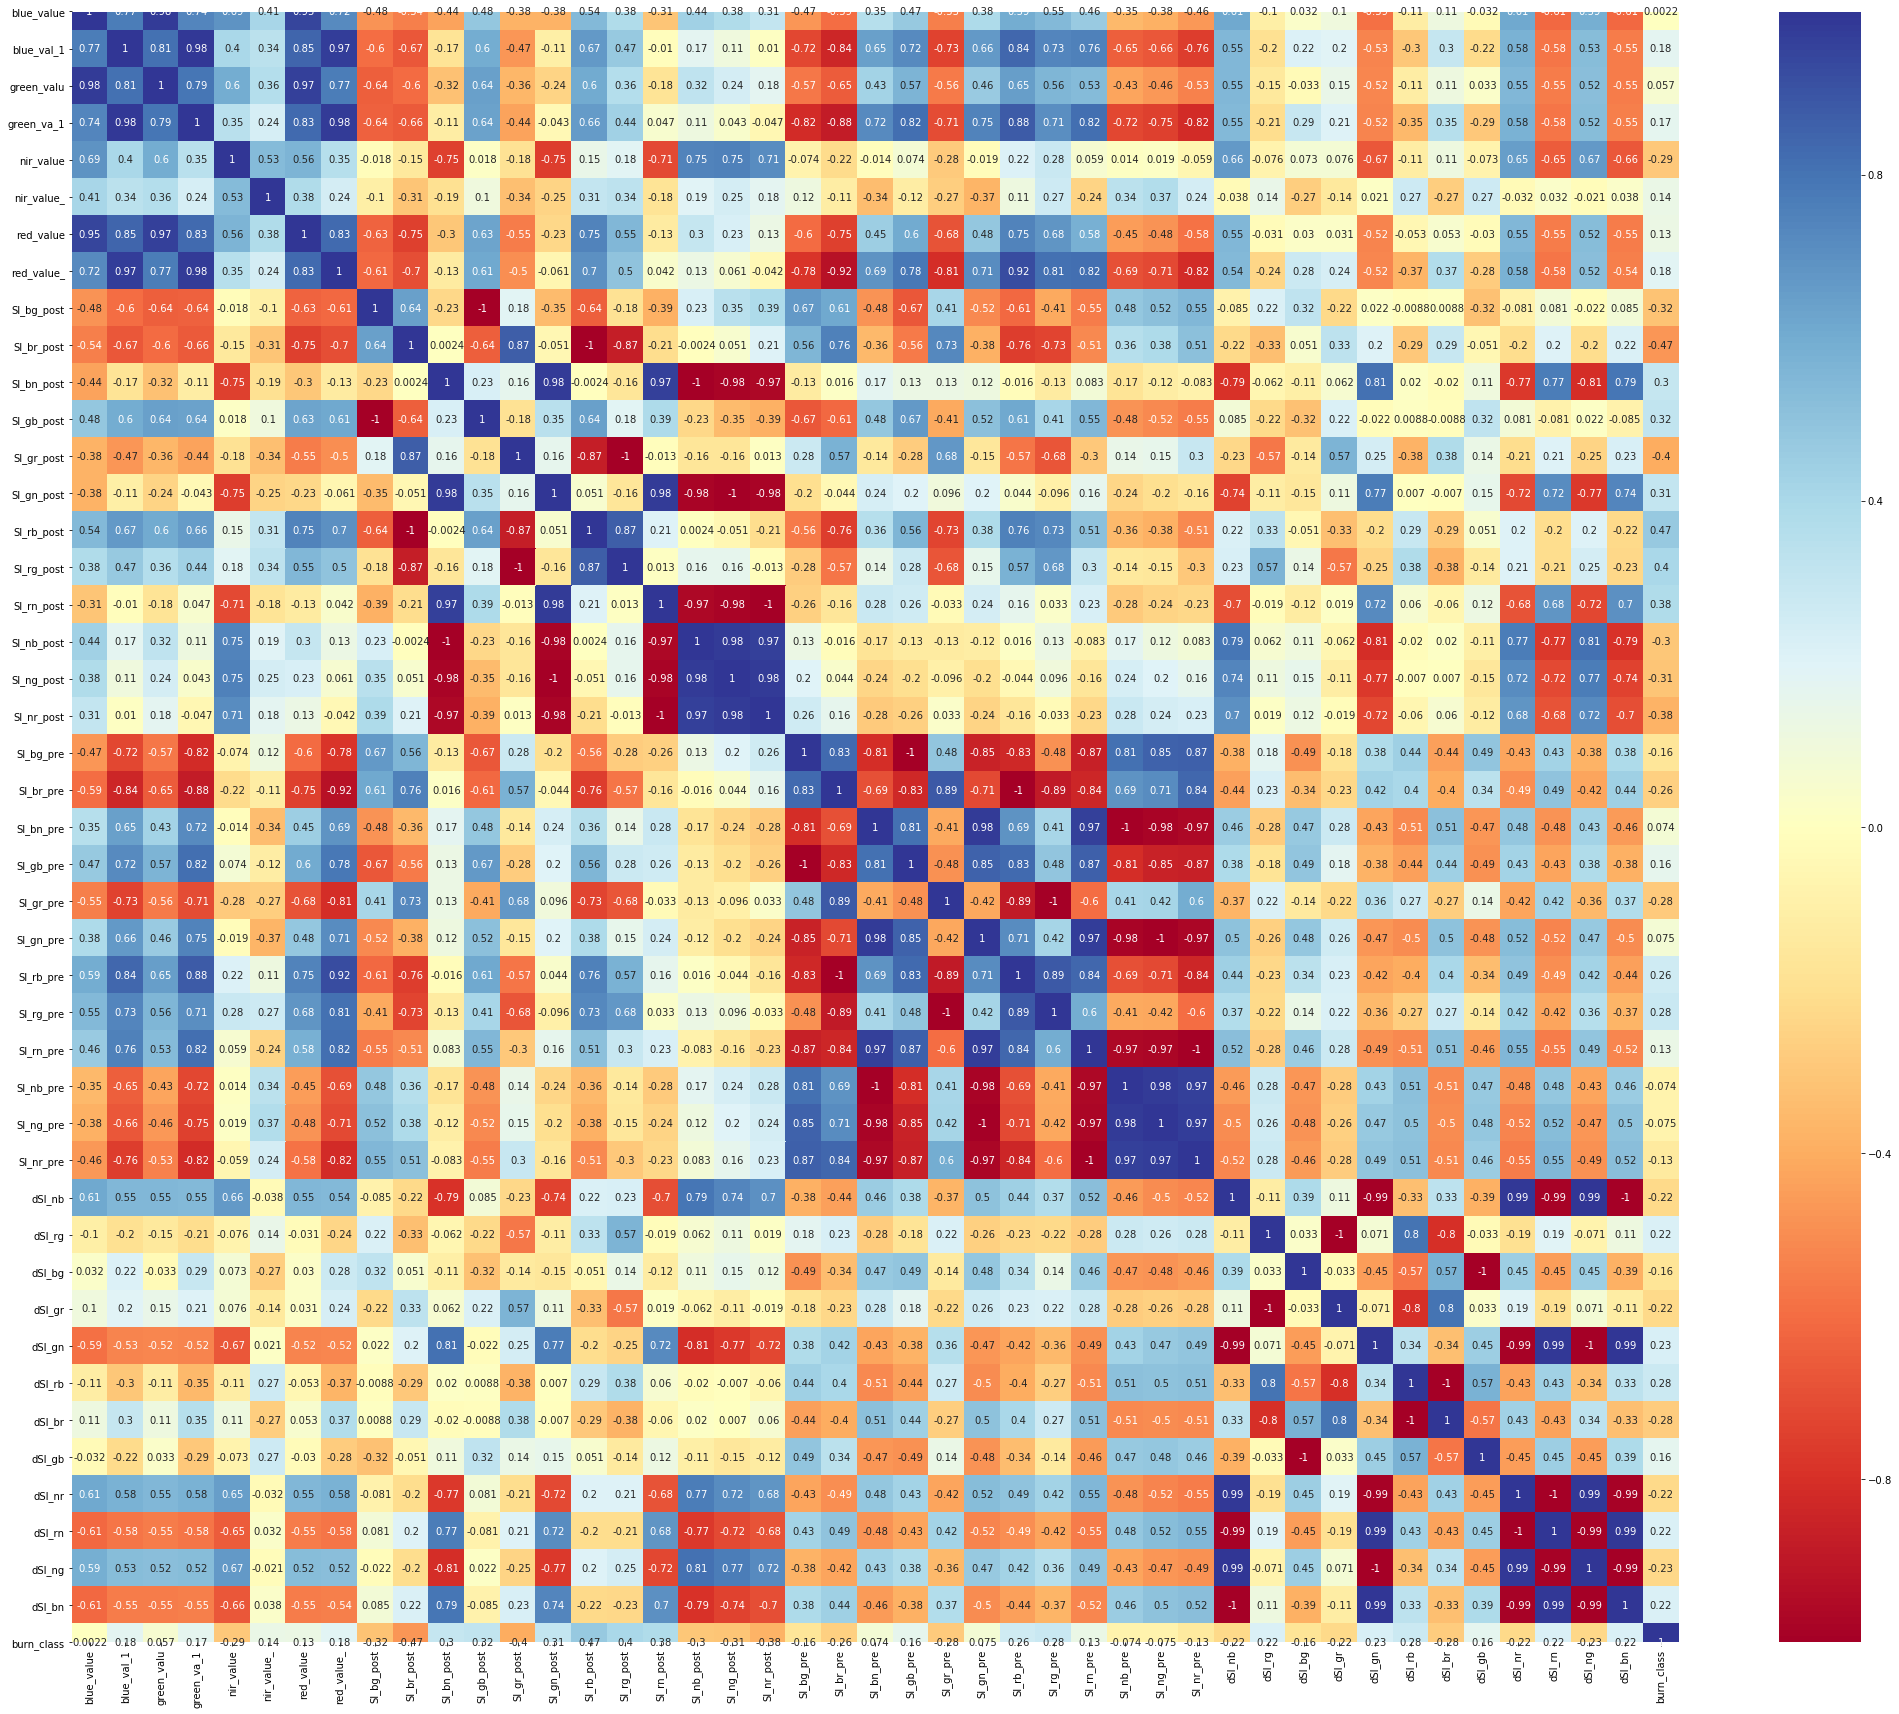

In [62]:
plt.figure(figsize=(36, 30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlBu)
plt.show()

In [63]:
df.keys()

Index(['blue_value', 'blue_val_1', 'green_valu', 'green_va_1', 'nir_value',
       'nir_value_', 'red_value', 'red_value_', 'SI_bg_post', 'SI_br_post',
       'SI_bn_post', 'SI_gb_post', 'SI_gr_post', 'SI_gn_post', 'SI_rb_post',
       'SI_rg_post', 'SI_rn_post', 'SI_nb_post', 'SI_ng_post', 'SI_nr_post',
       'SI_bg_pre', 'SI_br_pre', 'SI_bn_pre', 'SI_gb_pre', 'SI_gr_pre',
       'SI_gn_pre', 'SI_rb_pre', 'SI_rg_pre', 'SI_rn_pre', 'SI_nb_pre',
       'SI_ng_pre', 'SI_nr_pre', 'dSI_nb', 'dSI_rg', 'dSI_bg', 'dSI_gr',
       'dSI_gn', 'dSI_rb', 'dSI_br', 'dSI_gb', 'dSI_nr', 'dSI_rn', 'dSI_ng',
       'dSI_bn', 'burn_class'],
      dtype='object')

In [64]:
#Correlation with output variable
cor_target = abs(cor["burn_class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.33]
relevant_features

SI_br_post    0.472885
SI_gr_post    0.404405
SI_rb_post    0.472885
SI_rg_post    0.404405
SI_rn_post    0.377467
SI_nr_post    0.377467
burn_class    1.000000
Name: burn_class, dtype: float64

In [68]:
print(df[["SI_br_post", "SI_rb_post"]].corr())
print(df[["SI_rg_post", "SI_gr_post"]].corr())
print(df[["SI_rn_post", "SI_nr_post"]].corr())

            SI_br_post  SI_rb_post
SI_br_post         1.0        -1.0
SI_rb_post        -1.0         1.0
            SI_rg_post  SI_gr_post
SI_rg_post         1.0        -1.0
SI_gr_post        -1.0         1.0
            SI_rn_post  SI_nr_post
SI_rn_post         1.0        -1.0
SI_nr_post        -1.0         1.0


The inverse SIs with same bands had a direct correlation. Will need to remove to improve performance of models.

In [69]:
df_rm = df.drop(columns=['SI_bg_post', 'SI_br_post', 'SI_bn_post', 'SI_bg_pre', 'SI_br_pre', 'SI_bn_pre',
                     'SI_gr_post', 'SI_gn_post', 'SI_gr_pre', 'SI_gn_pre', 'SI_rn_post', 'SI_rn_pre', 
                     'dSI_bg', 'dSI_gr', 'dSI_gn', 'dSI_br', 'dSI_rn', 'dSI_bn'])
df_rm.head()

,blue_value,blue_val_1,green_valu,green_va_1,nir_value,nir_value_,red_value,red_value_,SI_gb_post,SI_rb_post,...,SI_nb_pre,SI_ng_pre,SI_nr_pre,dSI_nb,dSI_rg,dSI_rb,dSI_gb,dSI_nr,dSI_ng,burn_class
0,97.024300,72.765828,65.335643,50.062458,57.833333,99.000000,80.725107,56.197437,-0.195175,-0.091698,...,0.152732,0.328302,0.275794,-0.405810,0.047628,0.036776,-0.010337,-0.441008,-0.389213,0
1,94.475519,59.952203,63.518769,39.916764,45.800000,90.250000,79.149569,43.251224,-0.195936,-0.088270,...,0.201713,0.386683,0.352048,-0.548713,0.069467,0.073555,0.004681,-0.618952,-0.548766,0
2,86.018102,90.460690,65.027849,68.429520,20.533333,70.666667,75.688196,87.232648,-0.138966,-0.063881,...,-0.122847,0.016083,-0.104915,-0.491737,-0.045037,-0.045714,-0.000309,-0.468292,-0.536115,1
3,79.441831,94.398626,56.938570,64.188483,22.166667,87.633333,73.195121,77.480319,-0.165004,-0.040925,...,-0.037165,0.154423,0.061491,-0.526519,0.031099,0.057506,0.025492,-0.596595,-0.593989,0
4,98.464530,62.863757,62.296575,42.170497,71.461538,92.846154,71.210939,45.611160,-0.224980,-0.160622,...,0.192553,0.375329,0.341152,-0.351463,0.027575,-0.001575,-0.027965,-0.339396,-0.306810,0


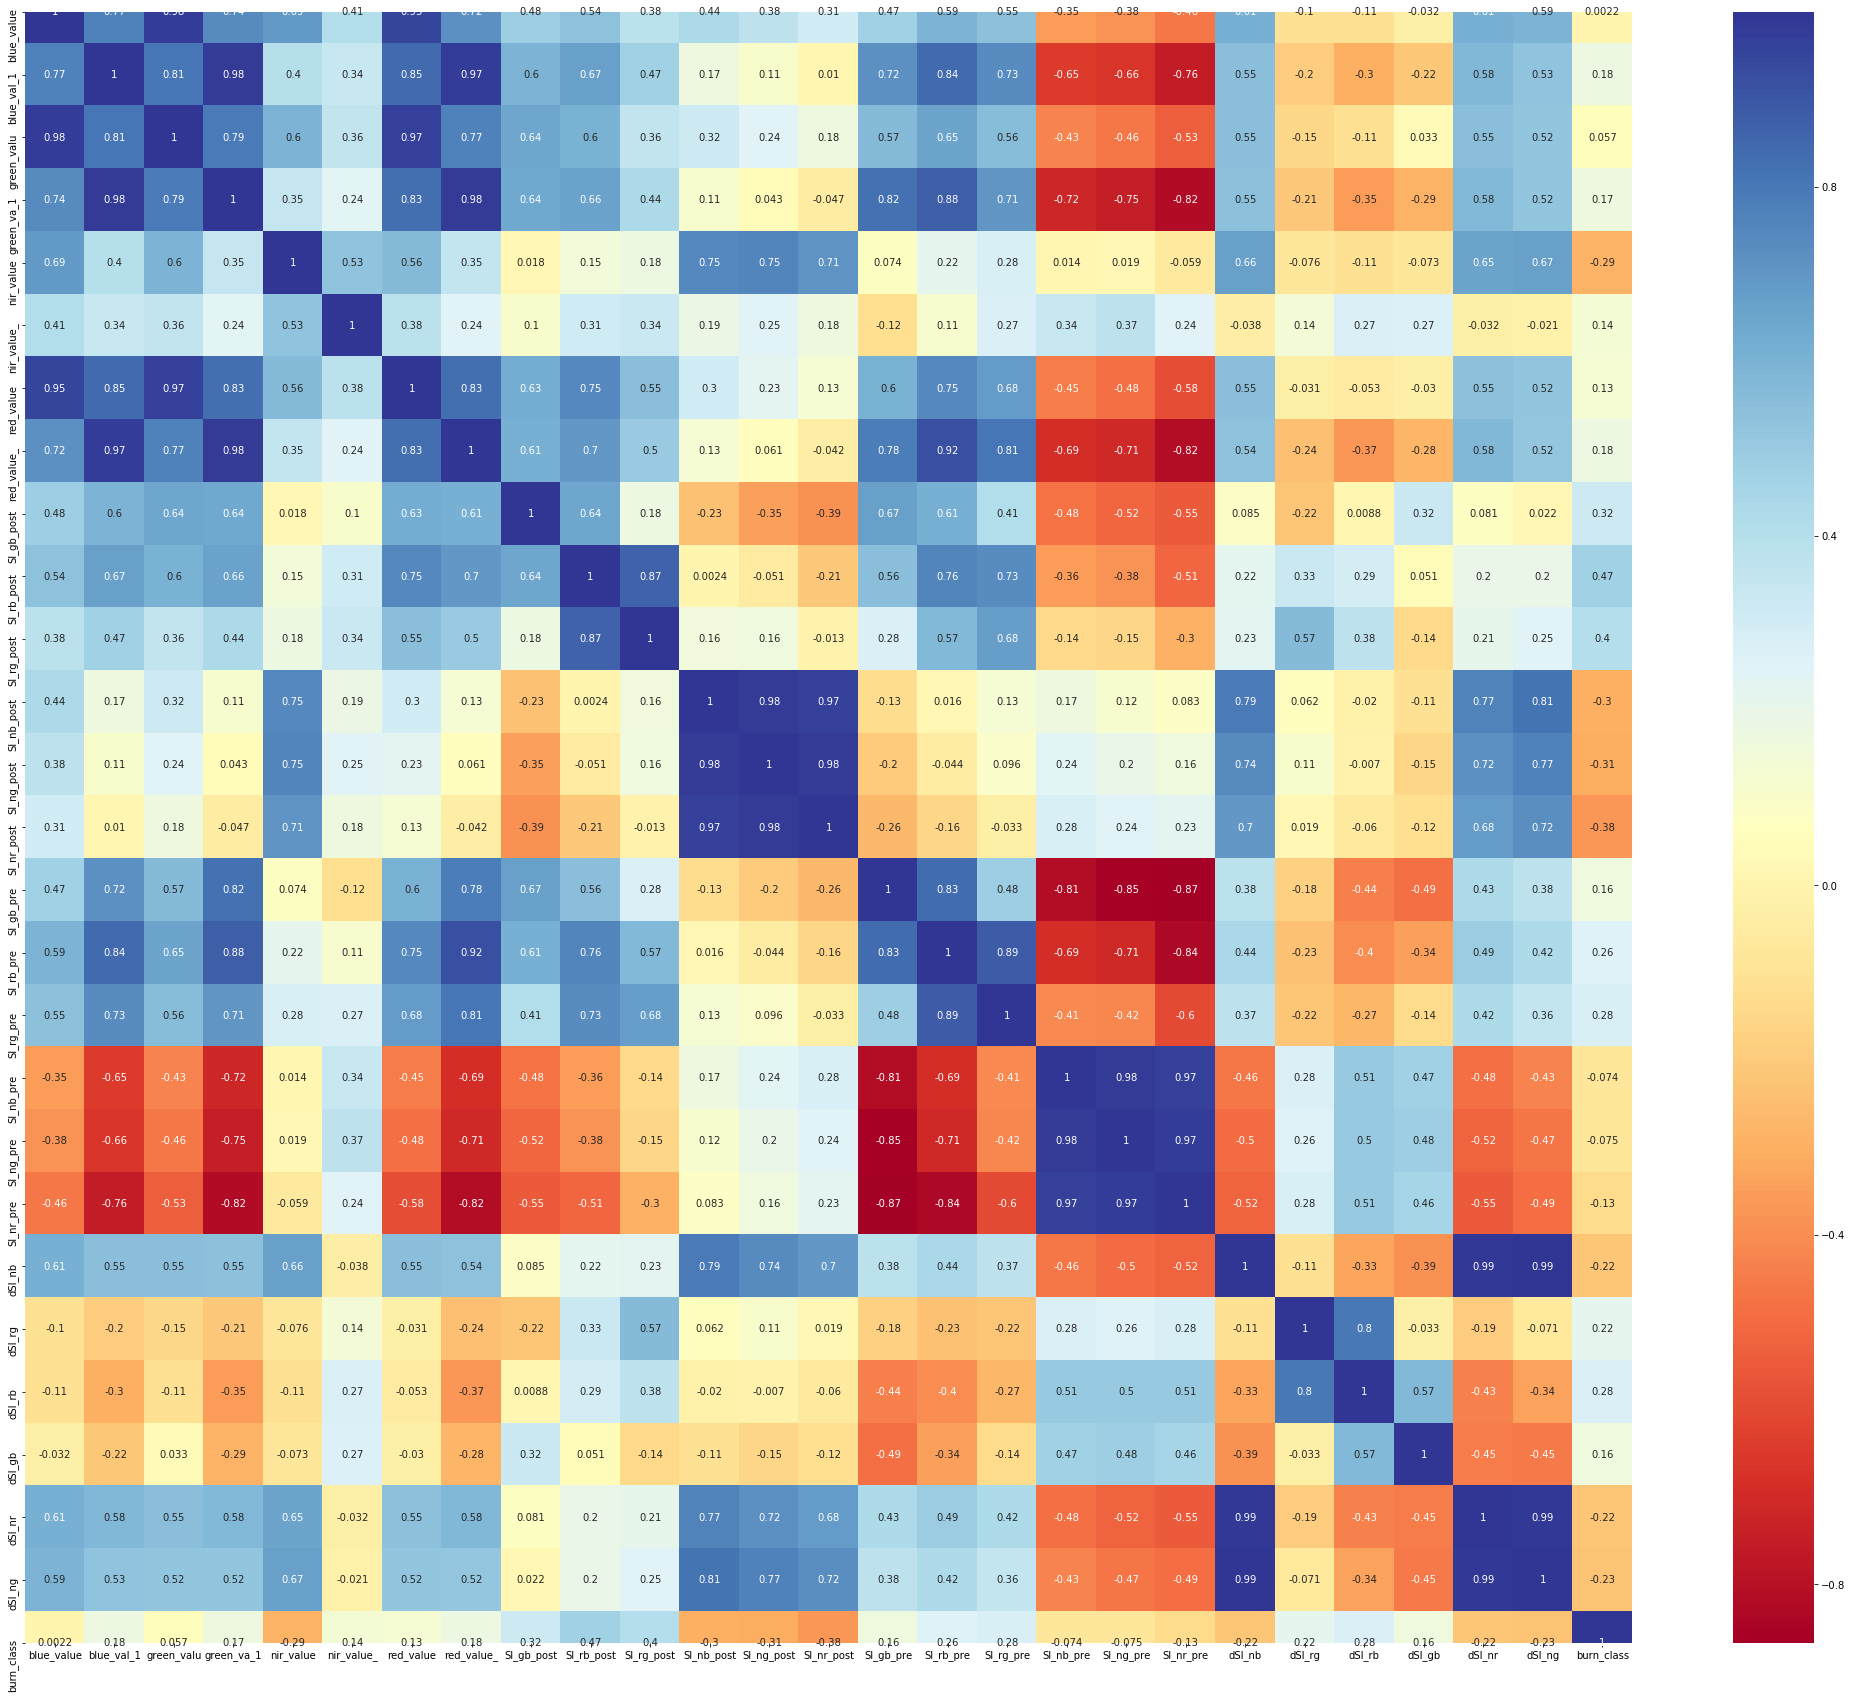

In [70]:
plt.figure(figsize=(36, 30))
cor = df_rm.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlBu)
plt.show()

In [71]:
#Correlation with output variable
cor_target = abs(cor["burn_class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.33]
relevant_features

SI_rb_post    0.472885
SI_rg_post    0.404405
SI_nr_post    0.377467
burn_class    1.000000
Name: burn_class, dtype: float64

In [72]:
print(df_rm[["SI_rb_post", "SI_rg_post"]].corr())
print(df_rm[["SI_rb_post", "SI_nr_post"]].corr())
print(df_rm[["SI_rg_post", "SI_nr_post"]].corr())
# can drop SI_rg_post since it has high correlation with rb and is less correlated to the target

            SI_rb_post  SI_rg_post
SI_rb_post    1.000000    0.868114
SI_rg_post    0.868114    1.000000
            SI_rb_post  SI_nr_post
SI_rb_post    1.000000   -0.208737
SI_nr_post   -0.208737    1.000000
            SI_rg_post  SI_nr_post
SI_rg_post    1.000000   -0.013023
SI_nr_post   -0.013023    1.000000


#### Convert to X and y

In [102]:
#build X and y
X = df_rm.drop(columns=['burn_class'])
y = df_rm['burn_class']

X_np = X.to_numpy()
y_np = y.to_numpy()

## Univariate feature selection - F-Test

In [99]:
from sklearn.feature_selection import SelectPercentile, f_classif

In [87]:
f_test, p_vals = f_classif(X, y)

In [88]:
f_test

array([6.59336460e-02, 4.60069871e+02, 4.57758505e+01, 4.16595236e+02,
       1.28583541e+03, 2.66456787e+02, 2.47995394e+02, 4.79860136e+02,
       1.55723644e+03, 4.05661379e+03, 2.75368850e+03, 1.37315324e+03,
       1.48798557e+03, 2.34012710e+03, 3.80747602e+02, 1.04606531e+03,
       1.23506909e+03, 7.78196358e+01, 7.93789160e+01, 2.53692930e+02,
       7.38455137e+02, 7.10208994e+02, 1.16602075e+03, 3.92671835e+02,
       7.38952821e+02, 7.85564848e+02])

In [98]:
p_vals

array([7.97355852e-001, 1.86506157e-100, 1.37822849e-011, 2.79873446e-091,
       1.47896040e-269, 2.35366451e-059, 2.10802342e-055, 1.26837534e-104,
       3.95252517e-323, 0.00000000e+000, 0.00000000e+000, 6.78484003e-287,
       1.51133913e-309, 0.00000000e+000, 1.08593740e-083, 1.98139907e-221,
       1.97793641e-259, 1.25999129e-018, 5.74741294e-019, 1.26915139e-056,
       1.53897300e-158, 1.06861129e-152, 1.32949444e-245, 3.23000356e-086,
       1.21452759e-158, 2.95013815e-168])

In [111]:
p_vals < 0.05

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

here only 'blue_value' would be worth dropping since it has no linear dependency on the target variable